In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
file = 'C:\\dj daily.csv'
df = pd.read_csv(file, skiprows = 5)

In [4]:
df['date'] = pd.to_datetime(df.date, format='%d/%m/%Y').dt.to_period('D')

In [5]:
# Setting Date Index
df.set_index('date', inplace=True)
df.index = df.index.to_timestamp()

# Functions

In [6]:
def correlation_matrix(dfc, title=''):
    """
    Generate a correlation matrix using Matplotlib
    dfc: DataFrame of interest for correlations
    title: String describing the phenomenon of interest
    """    
    fig, ax = plt.subplots(figsize=(16, 12))

    sns.set(font_scale=0.8)
    sns.heatmap(dfc.corr(), annot=True, cmap='coolwarm', ax=ax)
    ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=8)
    ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=8)
    ax.set_title(f'Correlation Matrix of {title}', fontsize=16)
    plt.show()
    

In [7]:
def r_squared(df_x, y):
    """
    Calculates the proportion of y's variance that is explained by the explanatory variables in df_x
    df_x are the explanatory variables as a Pandas DataFrame
    y is the dependent variable as a Pandas series
    """
    x = np.array(df_x)
    y = np.array(y).reshape(-1, 1) # Reshape to 2D array
    ols = LinearRegression().fit(x, y)
    print('R-squared or coefficient of determination:', np.round(ols.score(x, y), 4))
    

# Preparing Data

In [8]:
df_vix = df[['vix']]

In [9]:
# Original VIX data 
df_vix

vix
date             
2009-06-30  26.35
2009-07-01  26.22
2009-07-02  27.95
2009-07-03  27.95
2009-07-06  29.00
...           ...
2021-06-24  15.97
2021-06-25  15.62
2021-06-28  15.76
2021-06-29  16.02
2021-06-30  15.83

[3123 rows x 1 columns]

In [10]:
# The stationary data, including the estimated three latent factors
file = 'C:\\factors.csv'
df = pd.read_csv(file)

In [11]:
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d').dt.to_period('D')

In [12]:
# Setting Date Index
df.set_index('date', inplace=True)
df.index = df.index.to_timestamp()

In [13]:
df.isnull().values.any()

False

### Appending the original VIX Index to the stationary dataset

In [14]:
df_macro = df

In [15]:
# Place original VIX Index values into df_macro
df_macro['vix_index'] = df_vix.vix.iloc[1:]

In [16]:
df_macro

spx  spx_value    dj_mom   dj_tech   spx_oil       vix  \
date                                                                      
2009-07-01  0.435243   0.404485  0.548698  0.709637  0.264037 -0.494580   
2009-07-02 -2.957765  -3.240301 -2.914849 -2.322769 -4.240975  6.389472   
2009-07-03  0.000000  -0.000404  0.000000  0.000000  0.000000  0.000000   
2009-07-06  0.256248   0.492937 -0.093941 -0.537630 -2.951456  3.687863   
2009-07-07 -1.987985  -1.866508 -1.706203 -2.470537 -2.730256  6.184092   
...              ...        ...       ...       ...       ...       ...   
2021-06-24  0.579434   0.666715  1.447309  0.666377  1.582185 -2.167939   
2021-06-25  0.332507   0.737552 -0.382688 -0.197863  1.171340 -2.215982   
2021-06-28  0.231237  -0.620716  1.011241  1.482320 -4.509653  0.892294   
2021-06-29  0.027731  -0.300820 -0.192980  0.503908 -0.509276  1.636286   
2021-06-30  0.132723   0.429045  0.126685 -0.333059  1.925974 -1.193107   

                 oil    copper  us_ois  us_real10  us_yc   factor01  factor02  \
date                                                                            
2009-07-01 -0.833338  2.493022   -6.69       3.51   7.53   1.994018  1.573134   
2009-07-02 -3.793457 -1.085787   -7.33       4.21   1.43 -10.959370  0.118236   
2009-07-03  0.000000  0.000000   -1.78      -0.01   0.41  -0.290846 -0.253915   
2009-07-06 -4.099060 -1.739940   -3.86       4.26   4.79   2.504505  0.679455   
2009-07-07 -1.764103 -1.635158   -3.14      -6.36  -7.58  -7.623477  1.916702   
...              ...       ...     ...        ...    ...        ...       ...   
2021-06-24  0.300588 -0.451311    1.46       3.69   0.09   2.857260 -0.835063   
2021-06-25  1.017993 -0.441707    1.55      -1.12   3.41   1.062054  0.693455   
2021-06-28 -1.551474 -0.326721   -1.90      -2.27  -3.58  -2.202163  1.892326   
2021-06-29  0.095963 -0.035069    0.18      -0.03  -0.29  -0.708645  0.334164   
2021-06-30  0.669173  0.466582    0.63      -0.92   0.01   2.228345 -0.626555   

            factor03  vix_index  
date                             
2009-07-01  0.232349      26.22  
2009-07-02  1.471476      27.95  
2009-07-03  0.030770      27.95  
2009-07-06 -2.109683      29.00  
2009-07-07 -0.906133      30.85  
...              ...        ...  
2021-06-24 -0.304521      15.97  
2021-06-25 -0.961221      15.62  
2021-06-28  1.920570      15.76  
2021-06-29  1.258575      16.02  
2021-06-30 -1.291960      15.83  

[3122 rows x 15 columns]

### Finding & Deleting Outliers

In [17]:
# There are 21 instances of 'factor01' being 3 std above the mean
df_macro.factor01[(df_macro.factor01 > np.mean(df_macro.factor01) + 3*np.std(df_macro.factor01))].count()

21

In [18]:
# There are 22 instances of 'factor02' being 3 std above the mean
df_macro.factor02[(df_macro.factor02 > np.mean(df_macro.factor02) + 3*np.std(df_macro.factor02))].count()

22

In [19]:
# There are 13 instances of 'factor03' being 3 std above the mean
df_macro.factor03[(df_macro.factor03 > np.mean(df_macro.factor03) + 3*np.std(df_macro.factor03))].count()

13

In [20]:
df_macro.spx[(df_macro.spx > np.mean(df_macro.spx) + 3*np.std(df_macro.spx))].count()

20

In [21]:
df_macro.vix[(df_macro.vix > np.mean(df_macro.vix) + 3*np.std(df_macro.vix))].count()

41

In [22]:
df_macro = df_macro[(df_macro.factor01 <= np.mean(df_macro.factor01) + 3*np.std(df_macro.factor01))]

In [23]:
df_macro = df_macro[(df_macro.factor02 <= np.mean(df_macro.factor02) + 3*np.std(df_macro.factor02))]

In [24]:
df_macro = df_macro[(df_macro.factor03 <= np.mean(df_macro.factor03) + 3*np.std(df_macro.factor03))]

In [25]:
df_macro = df_macro[(df_macro.spx <= np.mean(df_macro.spx) + 3*np.std(df_macro.spx))]

In [26]:
df_macro = df_macro[(df_macro.vix <= np.mean(df_macro.vix) + 3*np.std(df_macro.vix))]

In [27]:
# A total of 96 observations were deleted from the data as outliers, or approximately 3.1% of observations
df_macro.shape

(3026, 15)

### Data Visualization

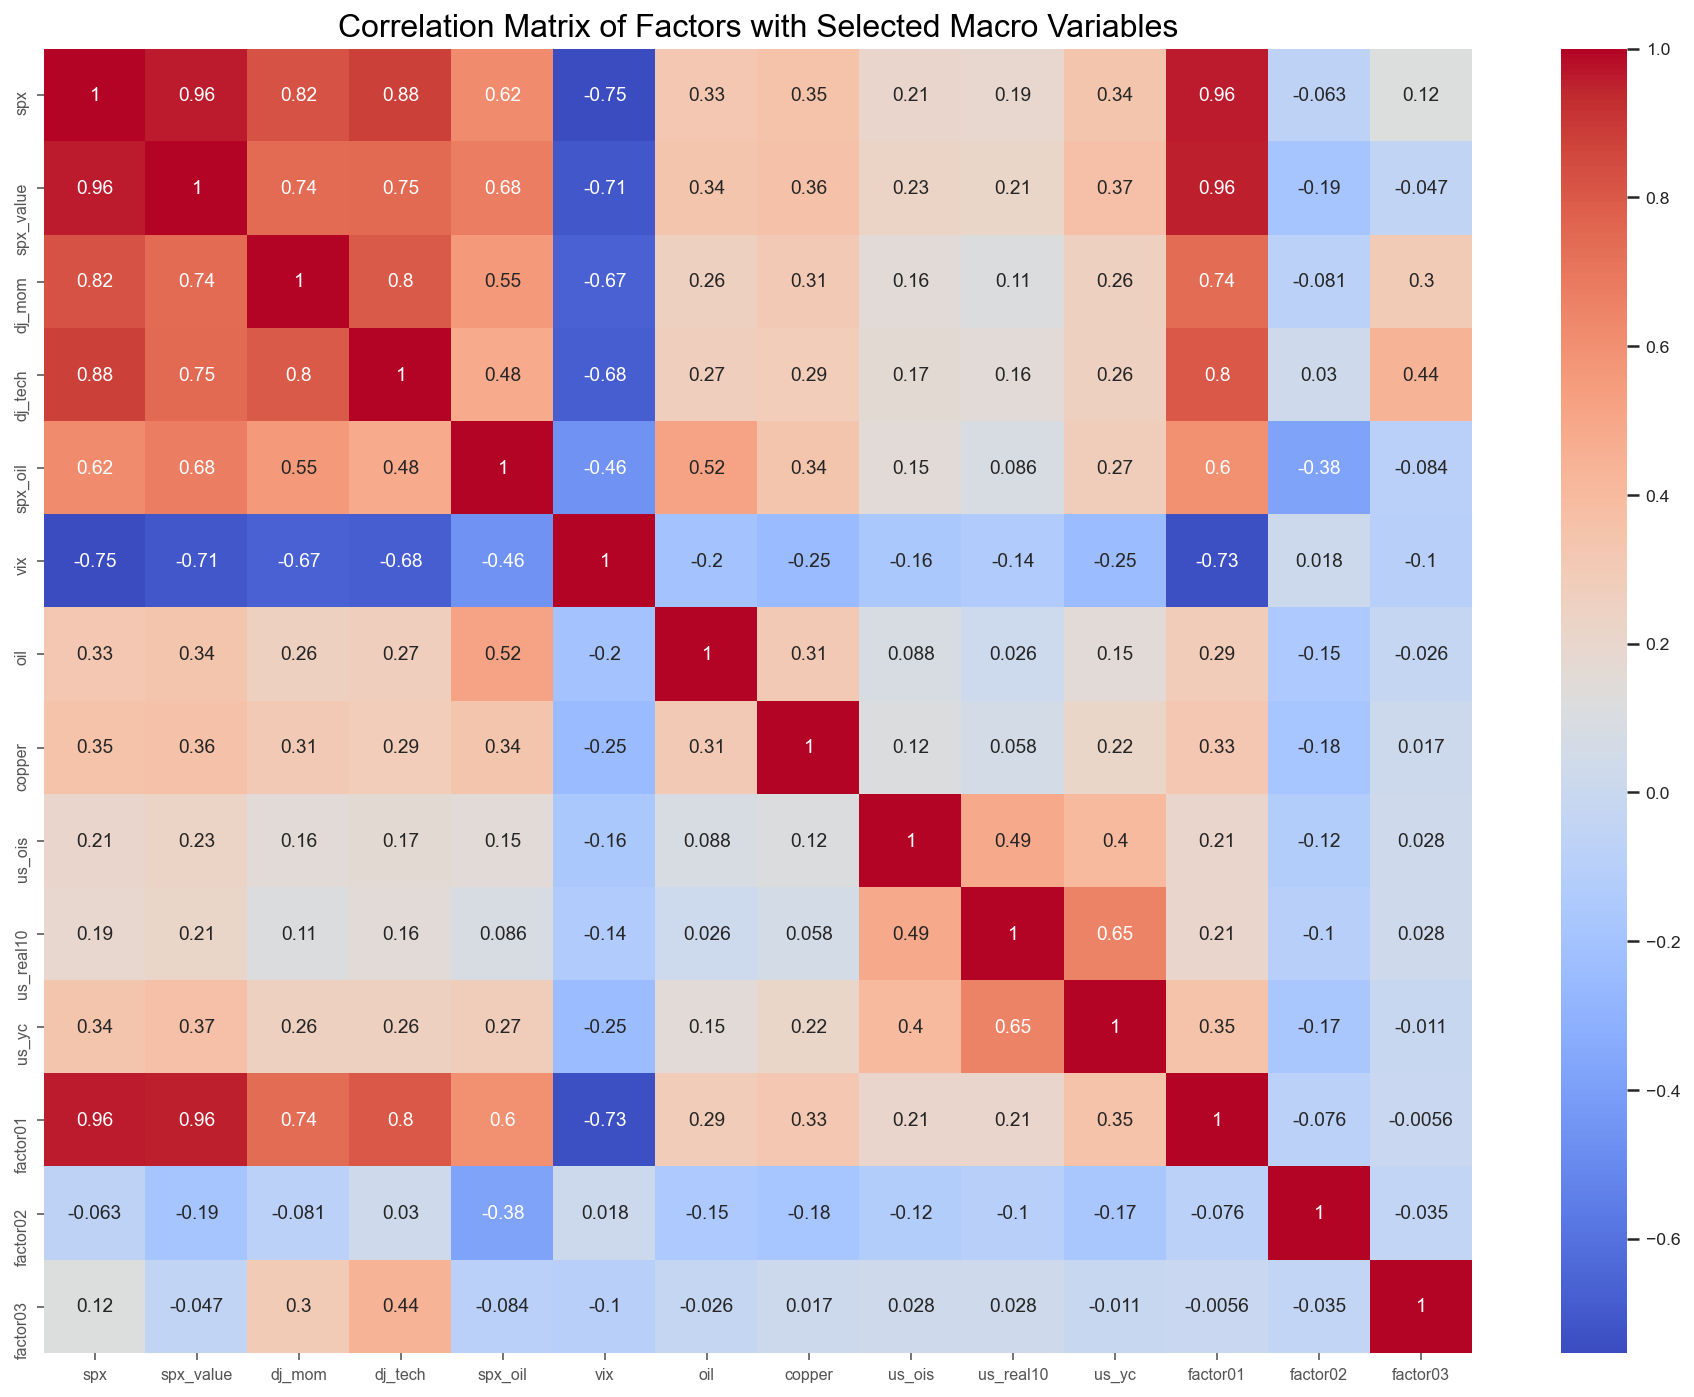

In [28]:
correlation_matrix(df_macro.iloc[:, :-1], title='Factors with Selected Macro Variables')

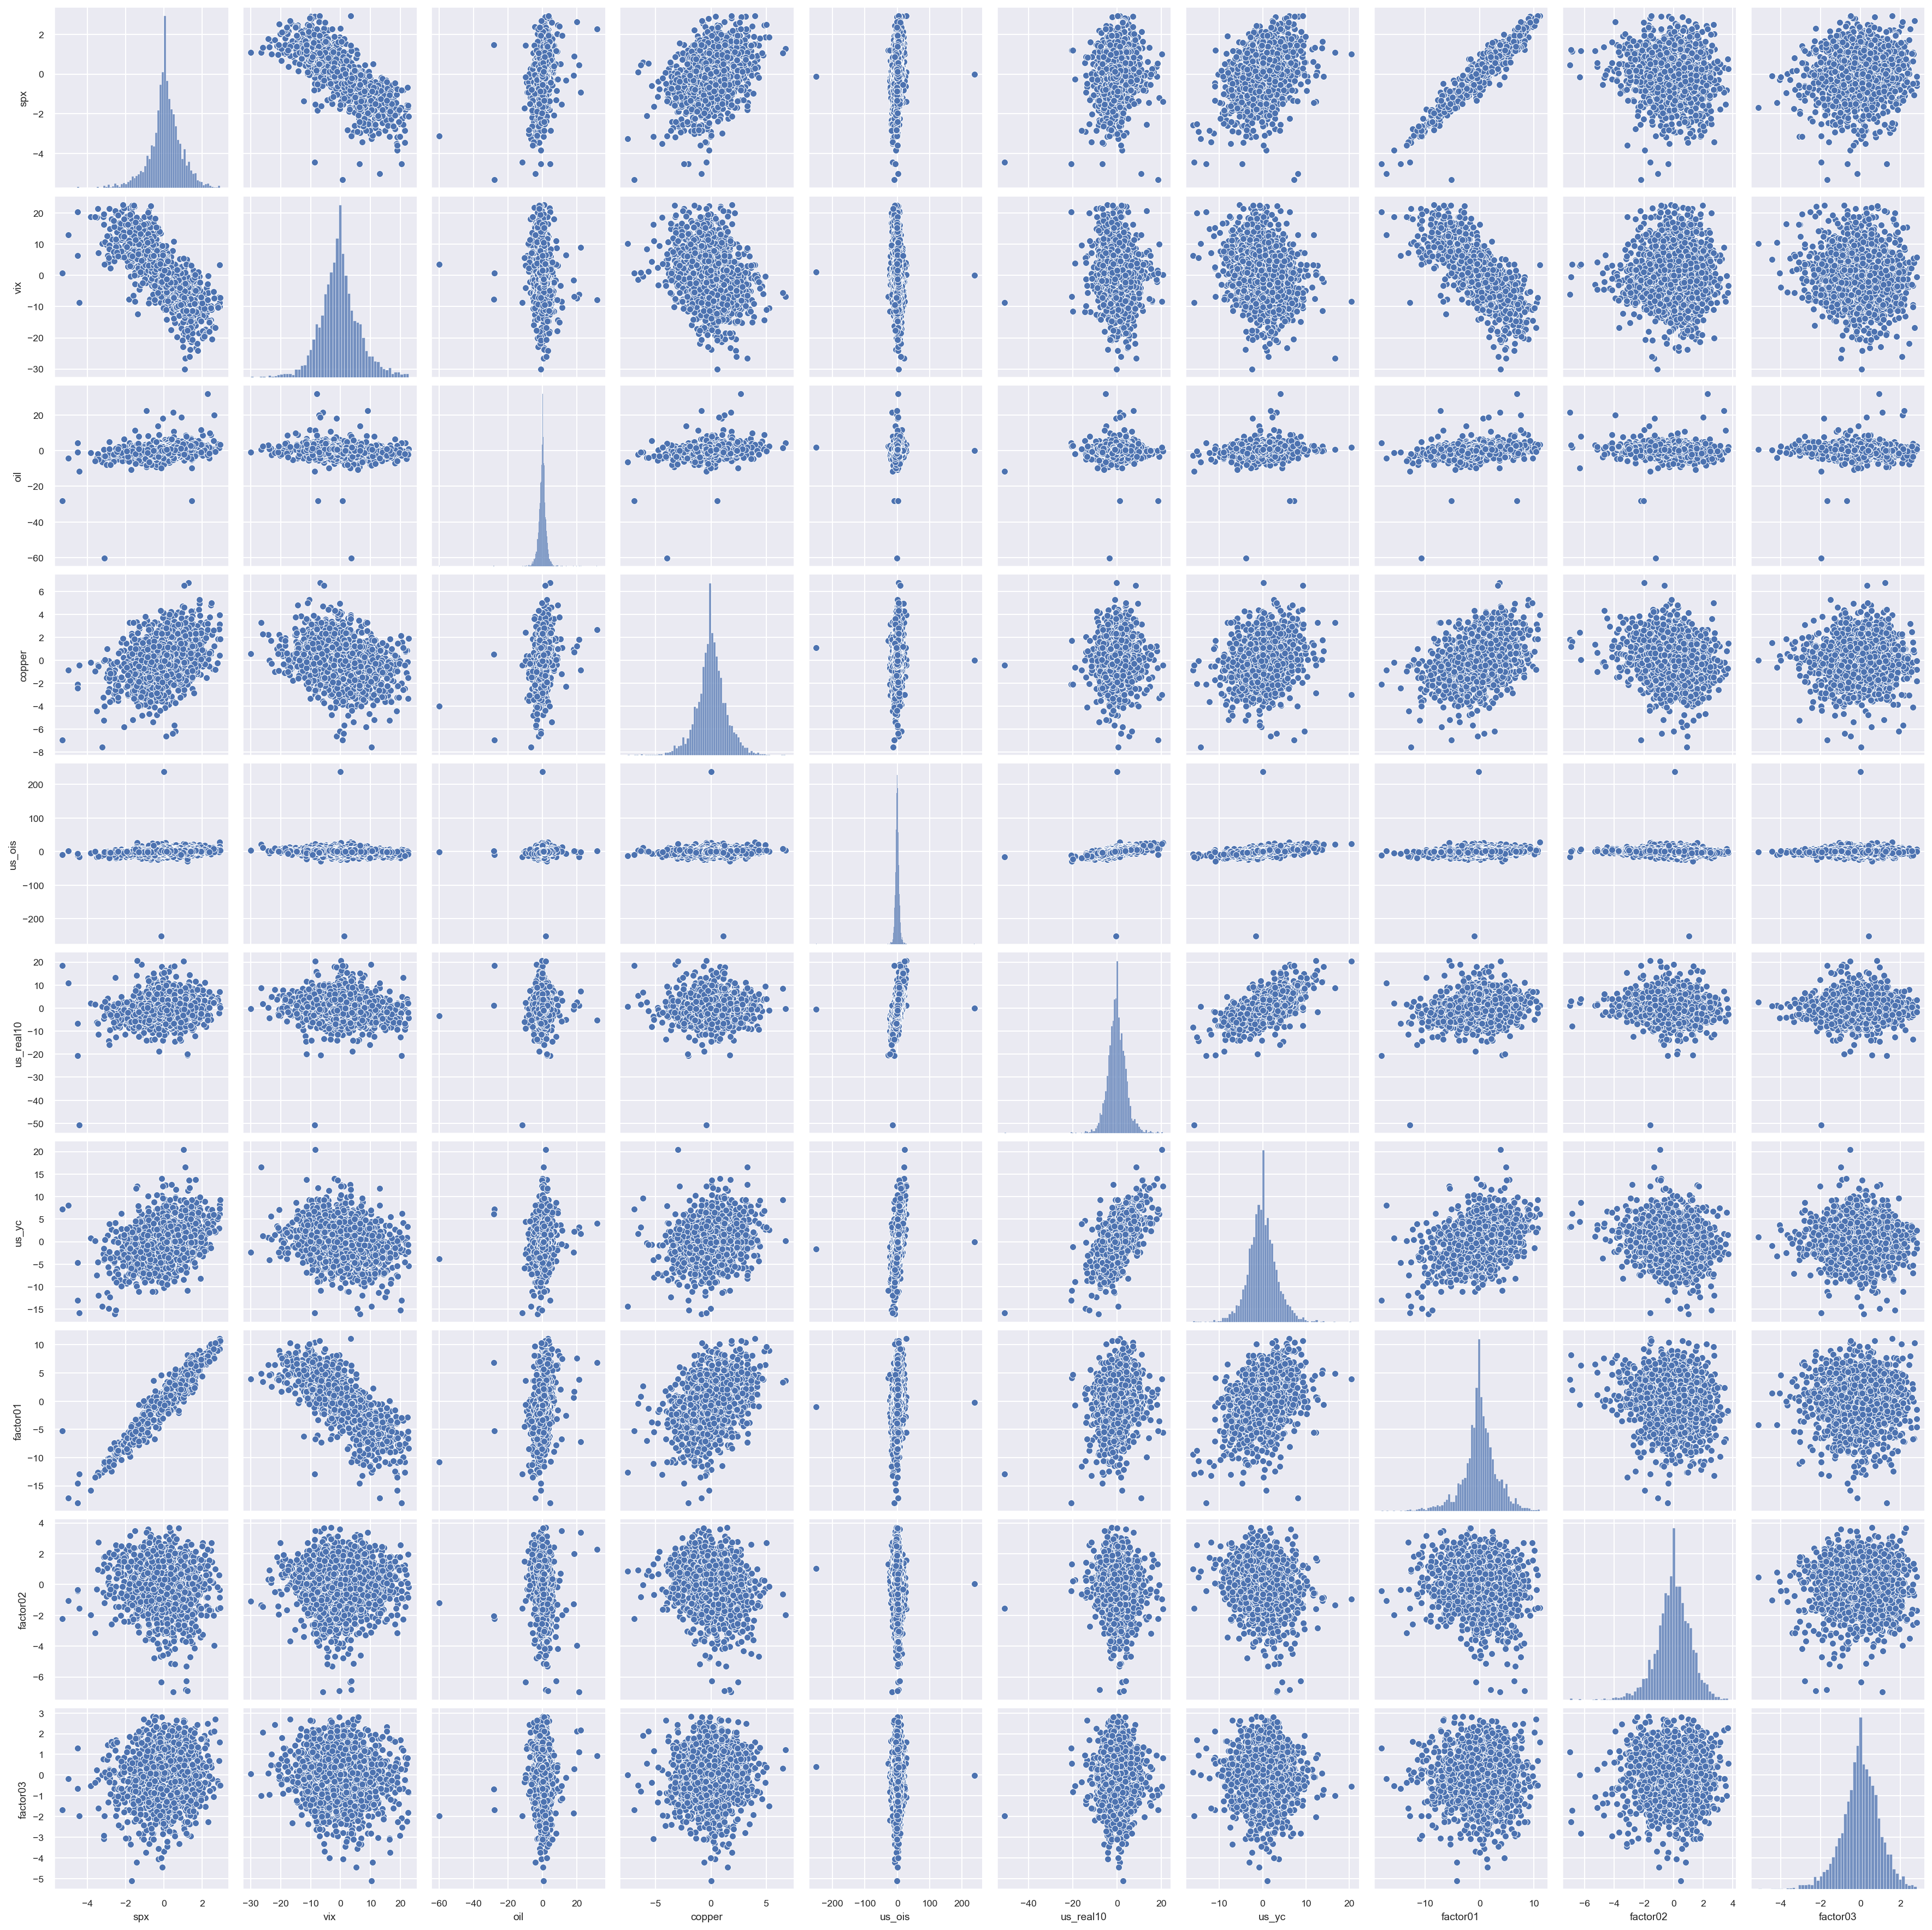

In [29]:
sns.pairplot(df_macro[['spx', 'vix', 'oil', 'copper', 'us_ois', 'us_real10', 'us_yc', 
                       'factor01', 'factor02', 'factor03']]);

# Analysing Latent Factors

### Dividing the data between high volatility and low volatility periods

In [30]:
df_macro[['vix_index']].describe()

vix_index
count  3026.000000
mean     17.940568
std       6.561337
min       9.140000
25%      13.350000
50%      16.225000
75%      20.970000
max      76.450000

In [31]:
# Splitting the data between moderate-to-low VIX (<25) and high VIX regimes...
df_low = df_macro[(df_macro.vix_index < 25)].copy()
df_high = df_macro[(df_macro.vix_index >= 25)].copy()

In [32]:
df_low.shape

(2646, 15)

In [33]:
df_high.shape

(380, 15)

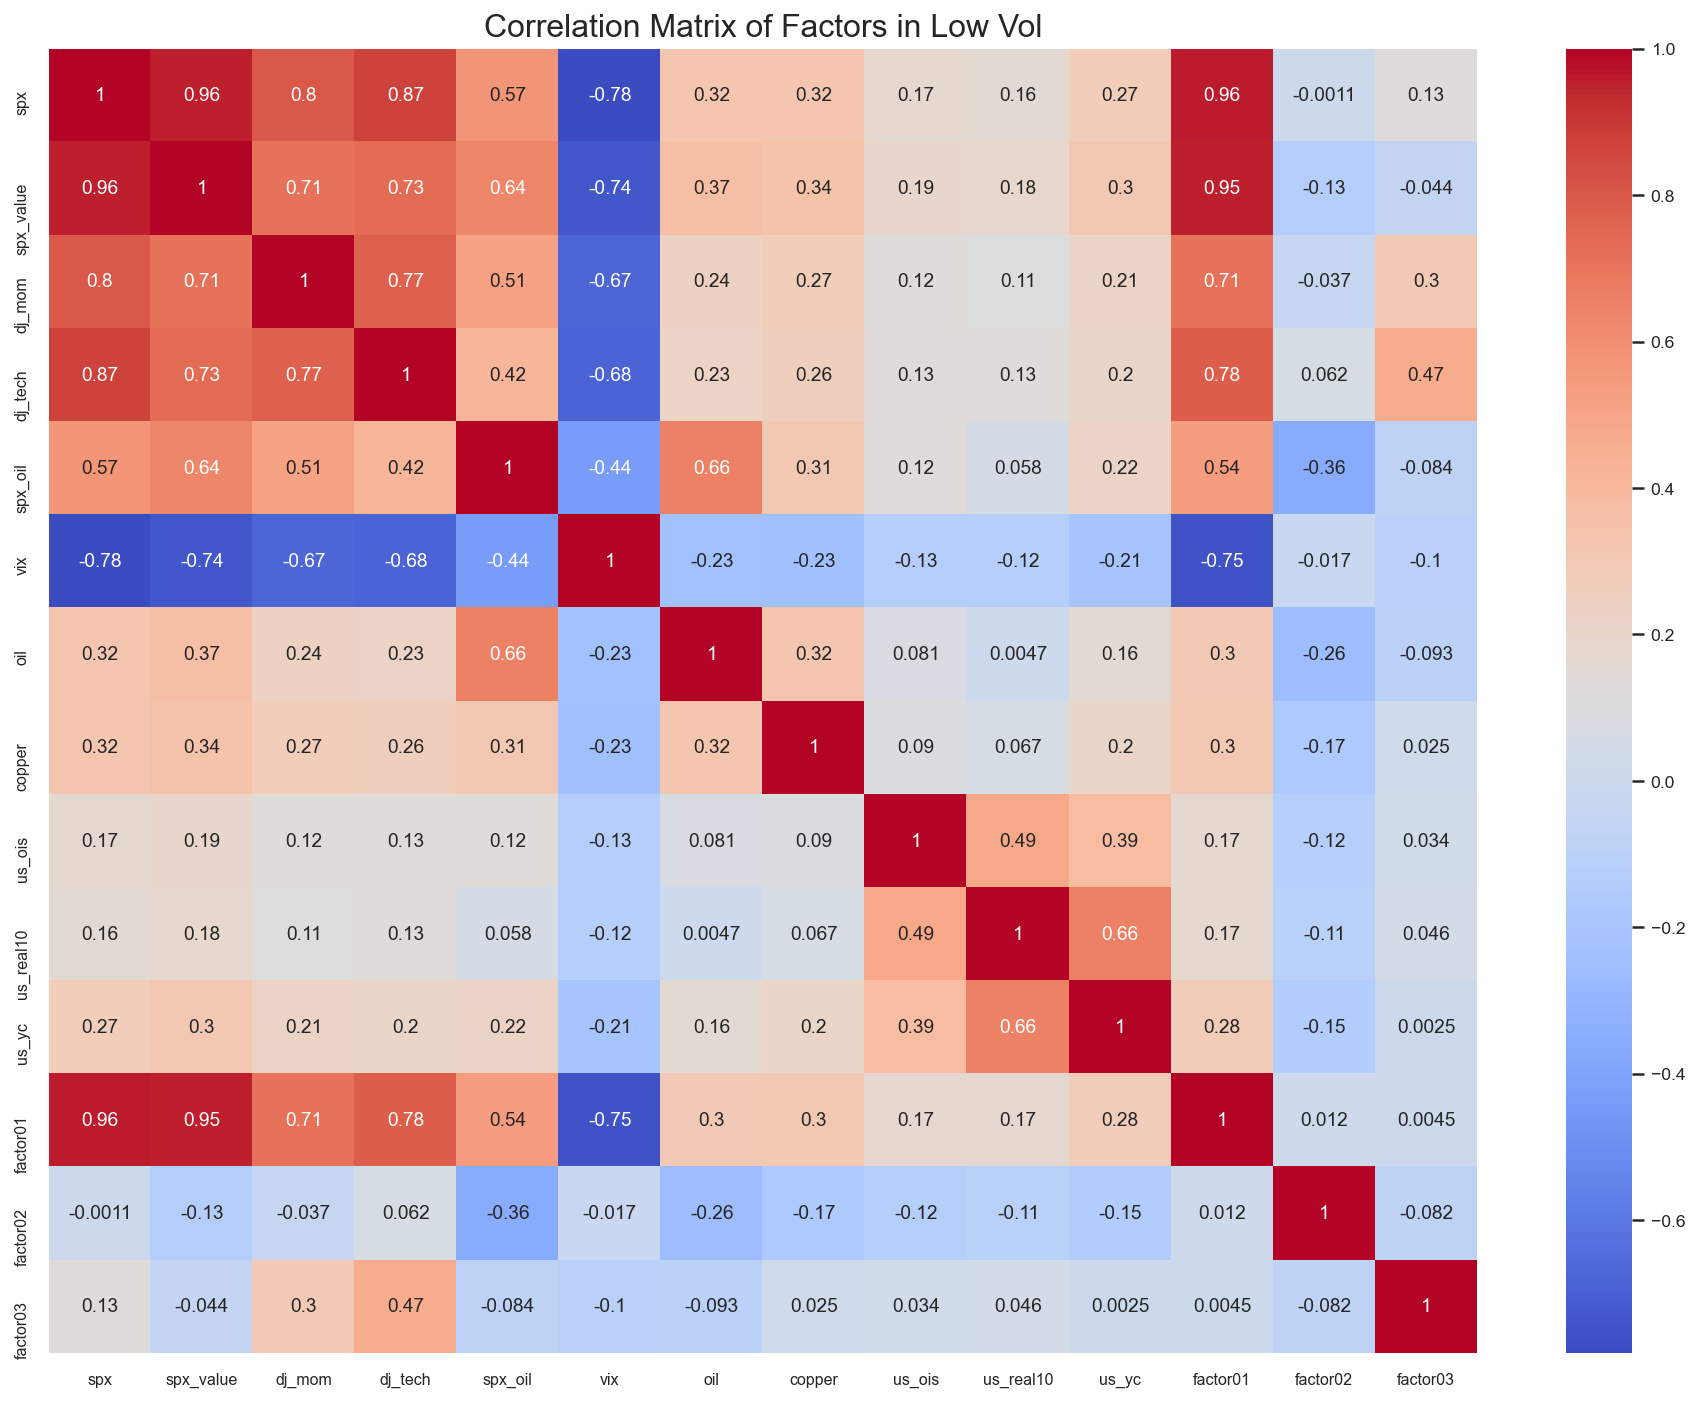

In [34]:
correlation_matrix(df_low.iloc[:, :-1], title='Factors in Low Vol')

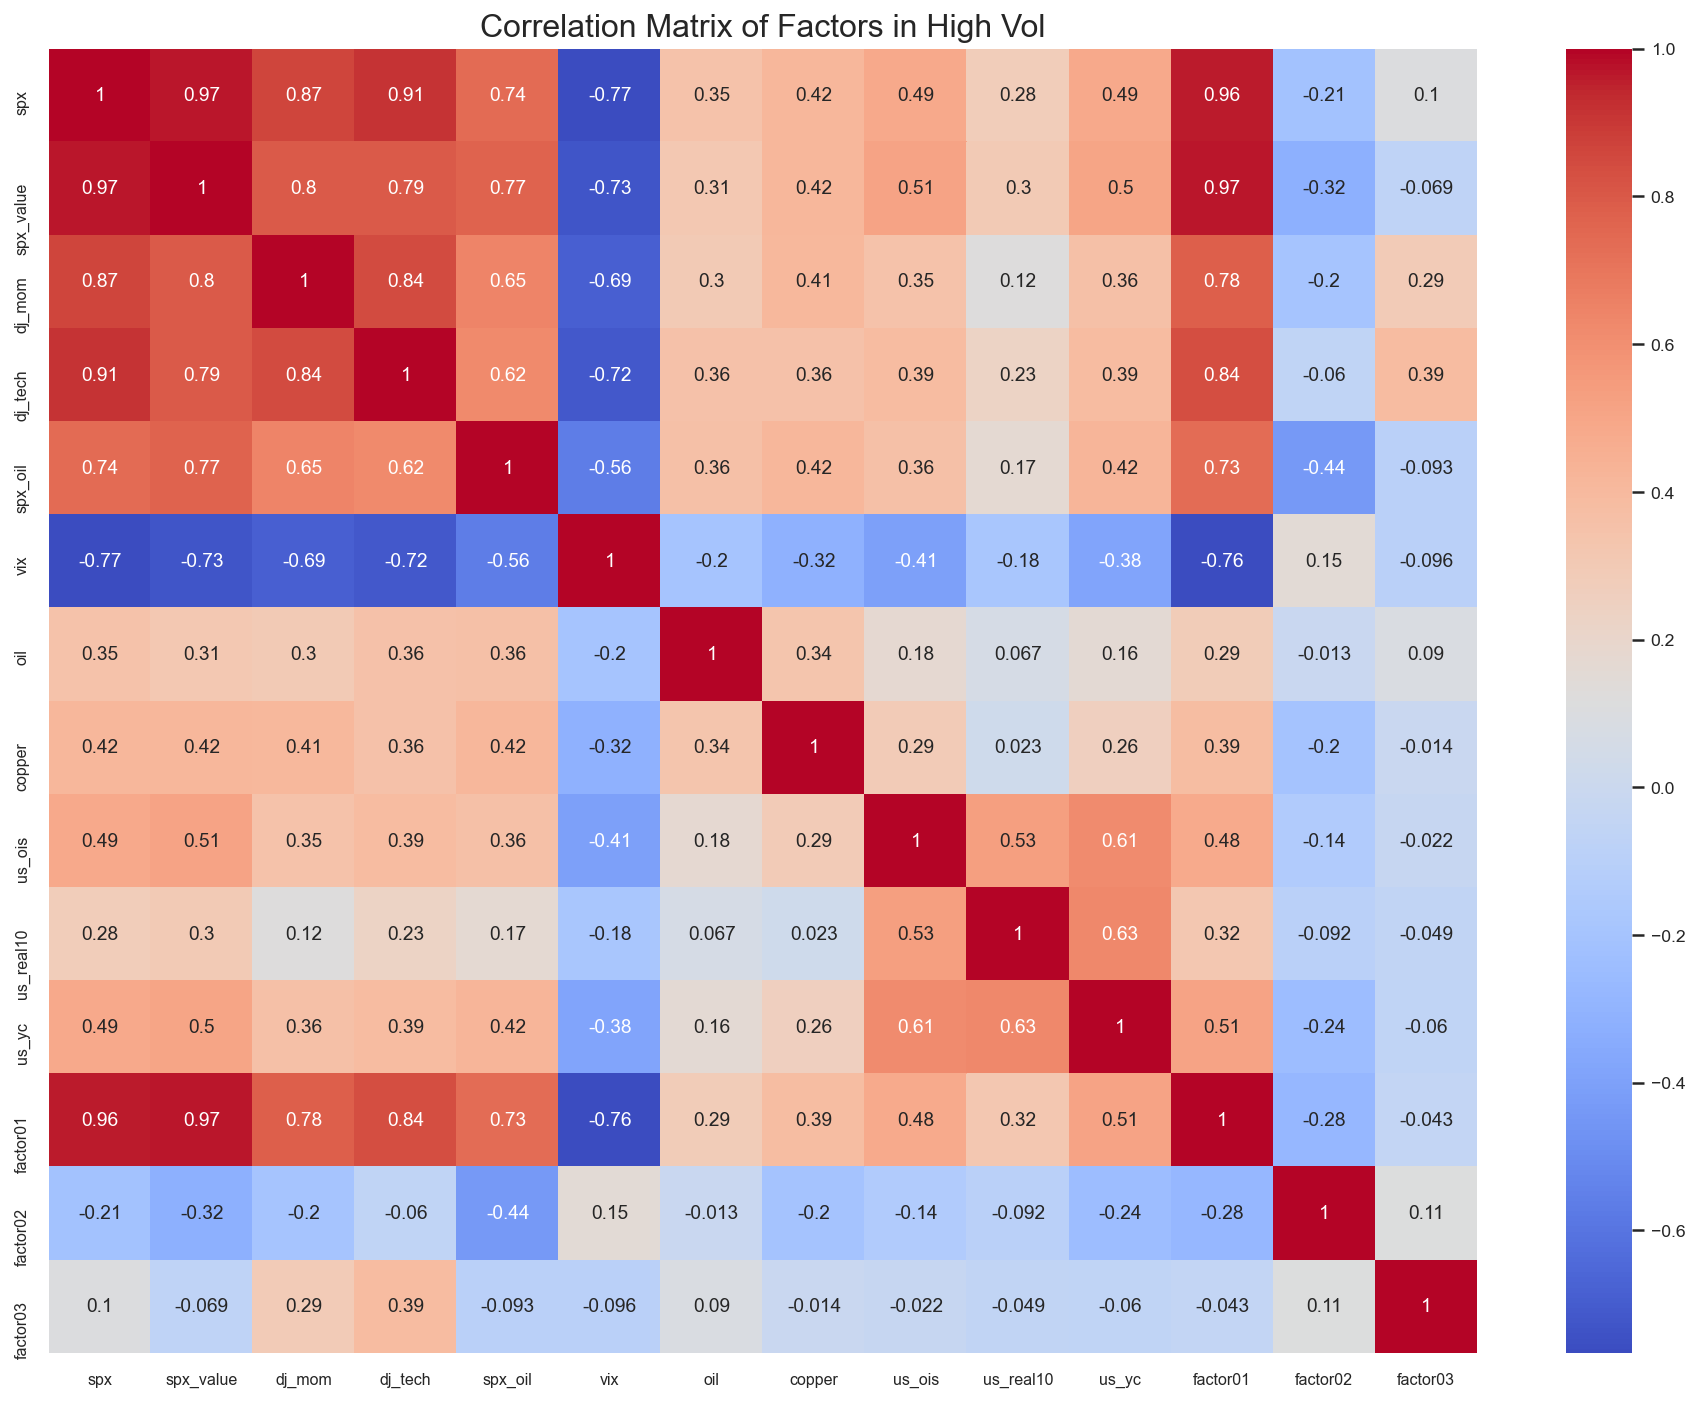

In [35]:
correlation_matrix(df_high.iloc[:, :-1], title='Factors in High Vol')

In [36]:
r_squared(df_macro[['spx']], df_macro.factor01)

R-squared or coefficient of determination: 0.9242


In [37]:
r_squared(df_low[['spx']], df_low.factor01)

R-squared or coefficient of determination: 0.9207


In [38]:
r_squared(df_high[['spx']], df_high.factor01)

R-squared or coefficient of determination: 0.9273


The **R-squared of factor01 is primarily explained by the S&P500 Index**, and it doesn't change that much whether in high or low VIX regimes.

In [39]:
r_squared(df_macro[['copper', 'oil', 'us_yc', 'us_real10']], df_macro.factor02)
r_squared(df_macro[['copper', 'spx_oil', 'us_yc', 'us_real10']], df_macro.factor02)
r_squared(df_macro[['copper', 'spx_oil', 'us_yc', 'us_real10', 'us_ois']], df_macro.factor02)

R-squared or coefficient of determination: 0.0589
R-squared or coefficient of determination: 0.1515
R-squared or coefficient of determination: 0.1523


In [40]:
r_squared(df_low[['copper', 'oil', 'us_yc', 'us_real10']], df_low.factor02)
r_squared(df_low[['copper', 'spx_oil', 'us_yc', 'us_real10']], df_low.factor02)
r_squared(df_low[['copper', 'spx_oil', 'us_yc', 'us_real10', 'us_ois']], df_low.factor02)

R-squared or coefficient of determination: 0.0864
R-squared or coefficient of determination: 0.1401
R-squared or coefficient of determination: 0.1418


In [41]:
r_squared(df_high[['copper', 'oil', 'us_yc', 'us_real10']], df_high.factor02)
r_squared(df_high[['copper', 'spx_oil', 'us_yc', 'us_real10']], df_high.factor02)
r_squared(df_high[['copper', 'spx_oil', 'us_yc', 'us_real10', 'us_ois']], df_high.factor02)

R-squared or coefficient of determination: 0.0892
R-squared or coefficient of determination: 0.1985
R-squared or coefficient of determination: 0.2023


The **R-squared of factor02 by the macro factors is very low**, and it doesn't change that much whether in high or low VIX regimes, though high regimes does have a slightly higher R-squared. *spx_oil* is a much better explanatory variable than *oil* in terms of the R-squared, so better to replace the latter with the former.

In [42]:
r_squared(df_macro[['dj_mom', 'dj_tech', 'spx_oil']], df_macro.factor03)
r_squared(df_macro[['dj_mom', 'dj_tech', 'spx_oil', 'spx']], df_macro.factor03)

R-squared or coefficient of determination: 0.3124
R-squared or coefficient of determination: 0.5741


In [43]:
r_squared(df_low[['dj_mom', 'dj_tech', 'spx_oil']], df_low.factor03)
r_squared(df_low[['dj_mom', 'dj_tech', 'spx_oil', 'spx']], df_low.factor03)

R-squared or coefficient of determination: 0.3156
R-squared or coefficient of determination: 0.5739


In [44]:
r_squared(df_high[['dj_mom', 'dj_tech', 'spx_oil']], df_high.factor03)
r_squared(df_high[['dj_mom', 'dj_tech', 'spx_oil', 'spx']], df_high.factor03)

R-squared or coefficient of determination: 0.3338
R-squared or coefficient of determination: 0.5941


The **R-squared of factor03 by various equity factors and sectors factors is in the moderate to high range**, and rather similar across the VIX regimes.

### Dividing the data between negative and positive S&P500 readings

In [45]:
# Splitting the data between negative and positive SPX values...
df_neg = df_macro[(df_macro.spx < 0)].copy()
df_pos = df_macro[(df_macro.spx >= 0)].copy()

In [46]:
df_neg.shape

(1295, 15)

In [47]:
df_pos.shape

(1731, 15)

In [48]:
r_squared(df_macro[['spx']], df_macro.factor01)

R-squared or coefficient of determination: 0.9242


In [49]:
r_squared(df_neg[['spx']], df_neg.factor01)

R-squared or coefficient of determination: 0.8686


In [50]:
r_squared(df_pos[['spx']], df_pos.factor01)

R-squared or coefficient of determination: 0.8566


The **R-squared of factor01 is again primarily explained by the S&P500 Index**, and it doesn't change much across negative or positive S&P500 readings.

In [51]:
r_squared(df_macro[['copper', 'oil', 'us_yc', 'us_real10']], df_macro.factor02)
r_squared(df_macro[['copper', 'spx_oil', 'us_yc', 'us_real10', 'us_ois']], df_macro.factor02)

R-squared or coefficient of determination: 0.0589
R-squared or coefficient of determination: 0.1523


In [52]:
r_squared(df_neg[['copper', 'oil', 'us_yc', 'us_real10']], df_neg.factor02)
r_squared(df_neg[['copper', 'spx_oil', 'us_yc', 'us_real10', 'us_ois']], df_neg.factor02)

R-squared or coefficient of determination: 0.0656
R-squared or coefficient of determination: 0.1854


In [53]:
r_squared(df_pos[['copper', 'oil', 'us_yc', 'us_real10']], df_pos.factor02)
r_squared(df_pos[['copper', 'spx_oil', 'us_yc', 'us_real10', 'us_ois']], df_pos.factor02)

R-squared or coefficient of determination: 0.0575
R-squared or coefficient of determination: 0.1649


The **R-squared of factor02 by the macro variables is again very low**. *spx_oil* again a is a much better explanatory variable than *oil* in terms of the R-squared.

In [54]:
r_squared(df_macro[['dj_mom', 'dj_tech', 'spx_oil']], df_macro.factor03)
r_squared(df_macro[['dj_mom', 'dj_tech', 'spx_oil', 'spx']], df_macro.factor03)

R-squared or coefficient of determination: 0.3124
R-squared or coefficient of determination: 0.5741


In [55]:
r_squared(df_neg[['dj_mom', 'dj_tech', 'spx_oil']], df_neg.factor03)
r_squared(df_neg[['dj_mom', 'dj_tech', 'spx_oil', 'spx']], df_neg.factor03)

R-squared or coefficient of determination: 0.3386
R-squared or coefficient of determination: 0.6053


In [56]:
r_squared(df_pos[['dj_mom', 'dj_tech', 'spx_oil']], df_pos.factor03)
r_squared(df_pos[['dj_mom', 'dj_tech', 'spx_oil', 'spx']], df_pos.factor03)

R-squared or coefficient of determination: 0.3372
R-squared or coefficient of determination: 0.5407


The **R-squared of factor03 by various equity and sector variables is again in the moderate to high range**, and it rises slightly in negative S&P500 readings.

### Dividing the data between the 2010-2019 and 2020-2021 (through June 2021) periods

In [57]:
# Setting the date cut-off to the last day of 2019
end_date = '2019-12-31'

In [58]:
df_2021 = df_macro.loc[df_macro.index > end_date]

In [59]:
df_0919 = df_macro.loc[df_macro.index <= end_date]

In [60]:
df_2021.shape

(343, 15)

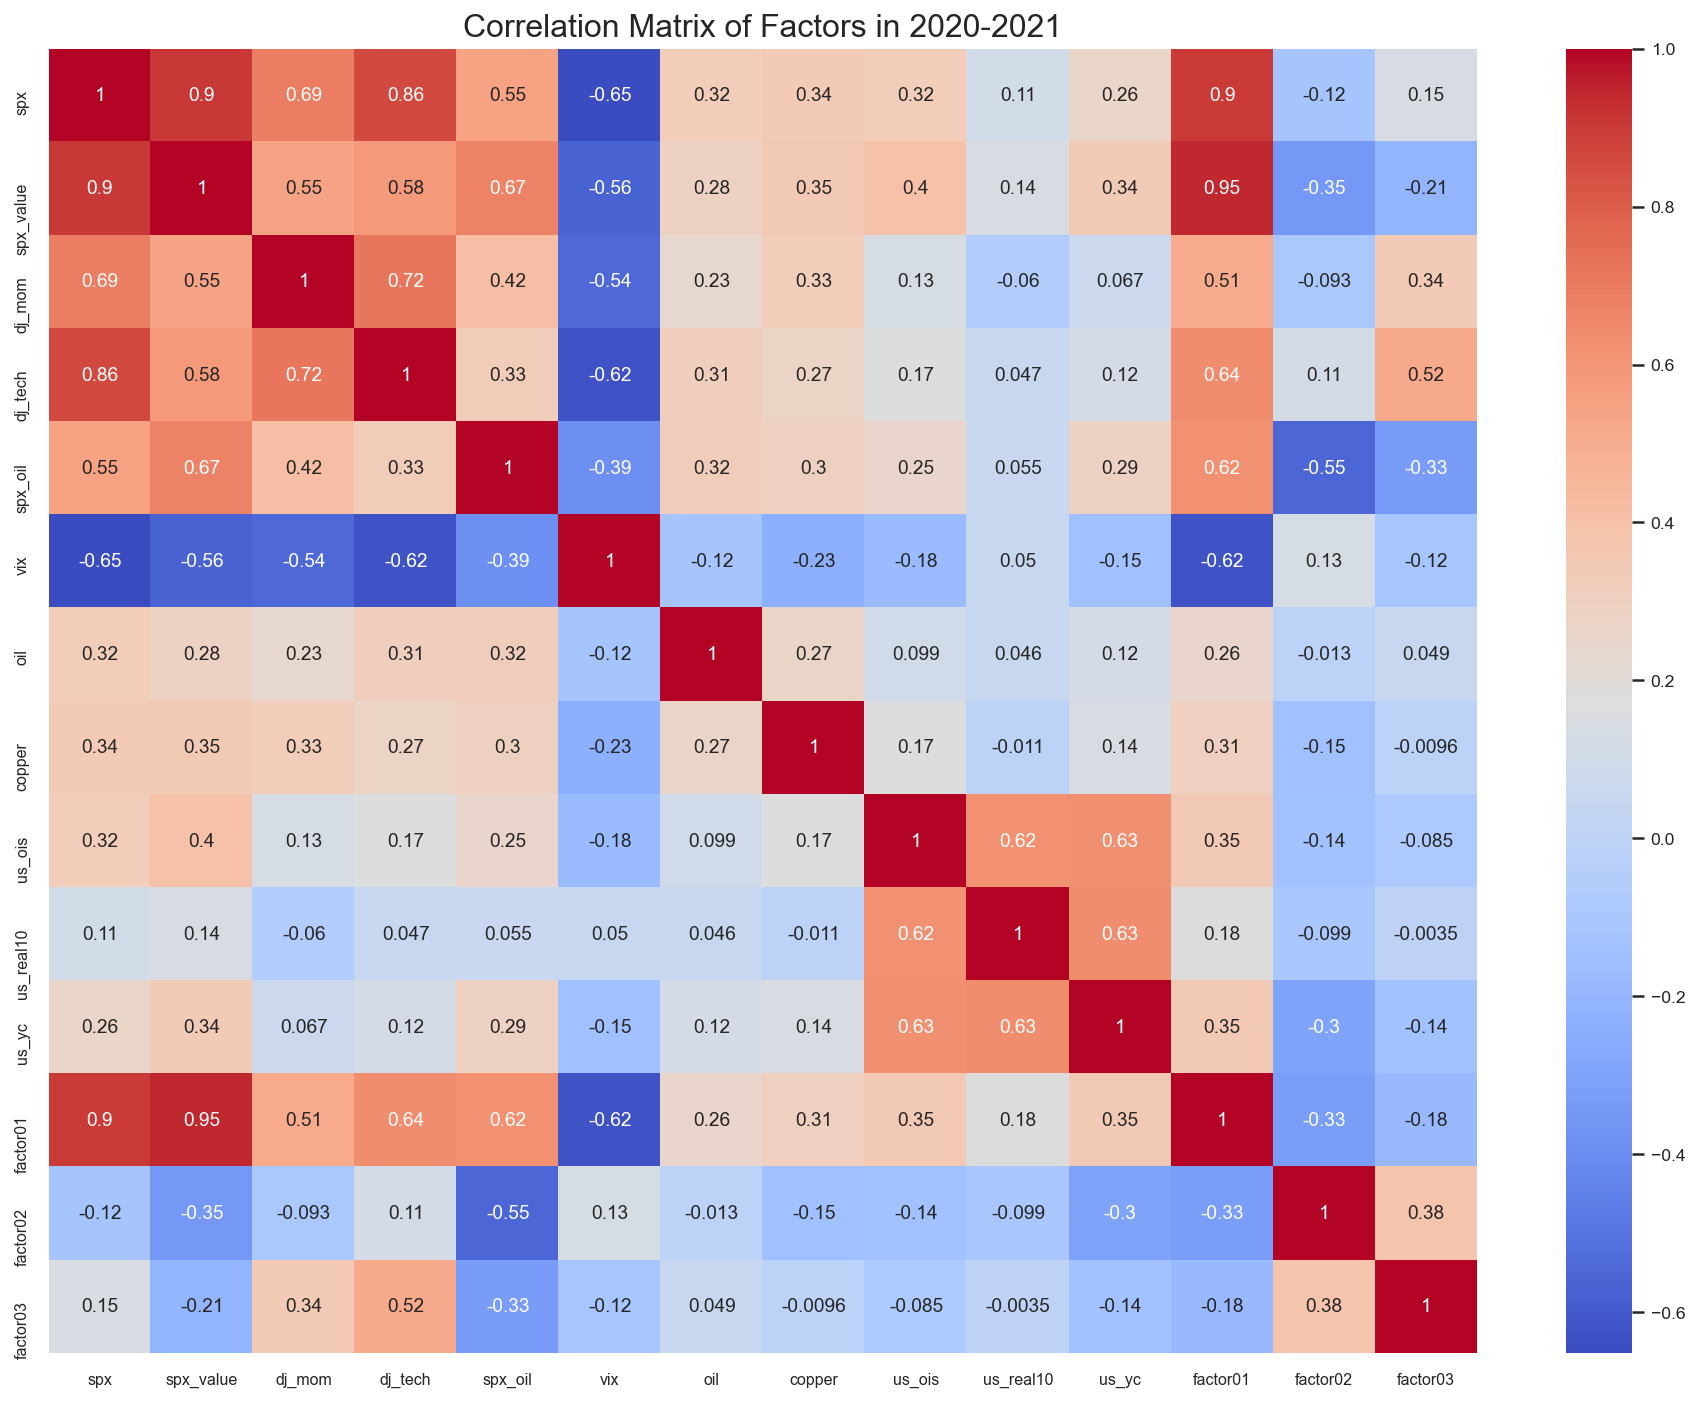

In [61]:
correlation_matrix(df_2021.iloc[:, :-1], title='Factors in 2020-2021')

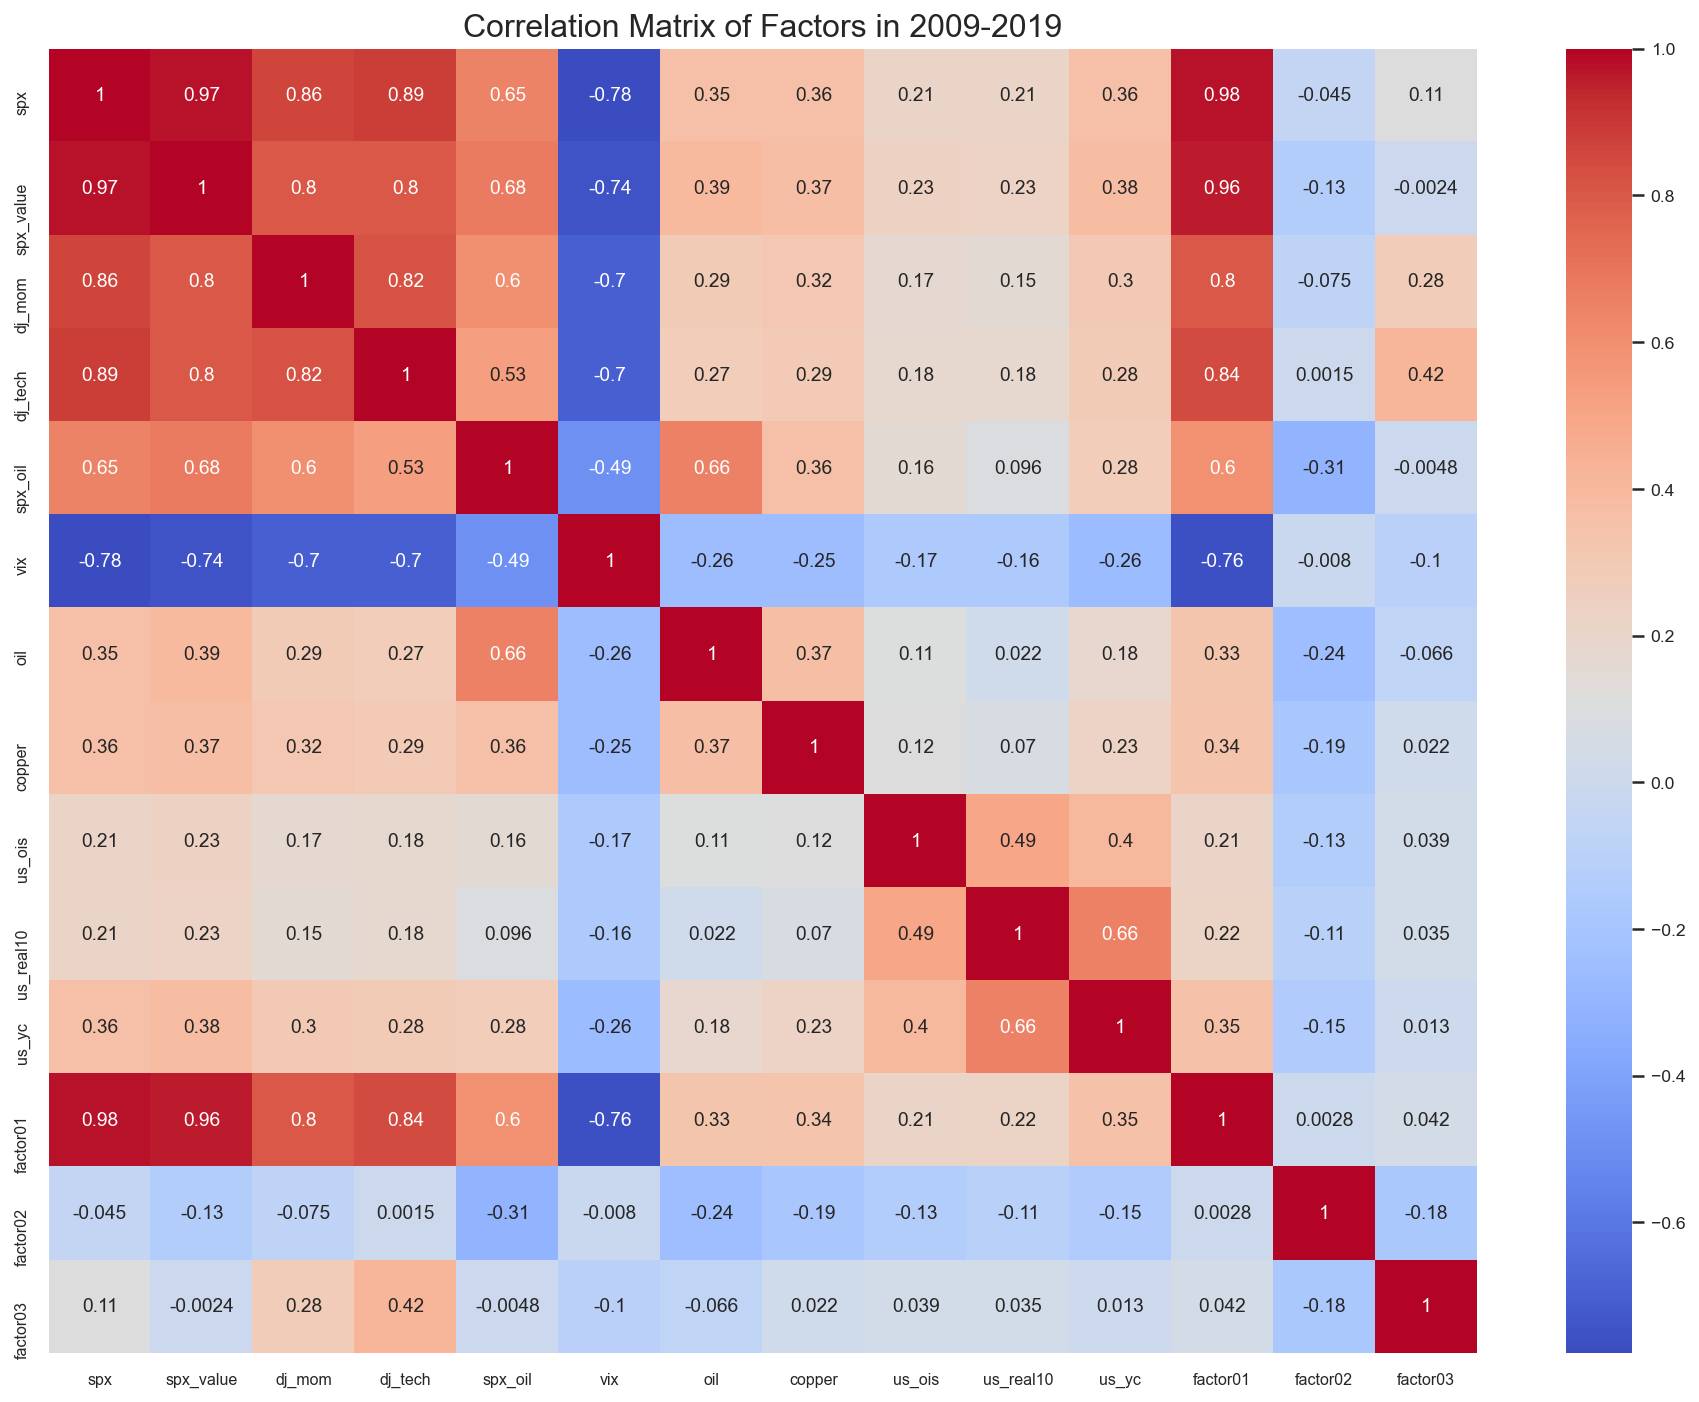

In [62]:
correlation_matrix(df_0919.iloc[:, :-1], title='Factors in 2009-2019')

In [63]:
r_squared(df_macro[['spx']], df_macro.factor01)
r_squared(df_0919[['spx']], df_0919.factor01)
r_squared(df_2021[['spx']], df_2021.factor01)

R-squared or coefficient of determination: 0.9242
R-squared or coefficient of determination: 0.9534
R-squared or coefficient of determination: 0.8117


The **R-squared of factor01 is again primarily explained by the S&P500 Index, but this time it drops significantly in the 2020-2021 period to just 0.81.**

In [64]:
r_squared(df_macro[['copper', 'spx_oil', 'us_yc', 'us_real10']], df_macro.factor02)
r_squared(df_macro[['copper', 'spx_oil', 'us_yc', 'us_real10', 'us_ois']], df_macro.factor02)

R-squared or coefficient of determination: 0.1515
R-squared or coefficient of determination: 0.1523


In [65]:
r_squared(df_0919[['copper', 'spx_oil', 'us_yc', 'us_real10']], df_0919.factor02)
r_squared(df_0919[['copper', 'spx_oil', 'us_yc', 'us_real10', 'us_ois']], df_0919.factor02)

R-squared or coefficient of determination: 0.1091
R-squared or coefficient of determination: 0.1115


In [66]:
r_squared(df_2021[['copper', 'spx_oil', 'us_yc', 'us_real10']], df_2021.factor02)
r_squared(df_2021[['copper', 'spx_oil', 'us_yc', 'us_real10', 'us_ois']], df_2021.factor02)

R-squared or coefficient of determination: 0.3304
R-squared or coefficient of determination: 0.3417


The **R-squared of factor02 by the macro factors remains relatively low, but it rises notably in the 2020-2021 period**. The R-squared from 2020-2021 is triple that from the 2010-2019 period, and is in the **moderate range**.

In [67]:
r_squared(df_macro[['dj_mom', 'dj_tech', 'spx_oil']], df_macro.factor03)
r_squared(df_macro[['dj_mom', 'dj_tech', 'spx_oil', 'spx']], df_macro.factor03)

R-squared or coefficient of determination: 0.3124
R-squared or coefficient of determination: 0.5741


In [68]:
r_squared(df_0919[['dj_mom', 'dj_tech', 'spx_oil']], df_0919.factor03)
r_squared(df_0919[['dj_mom', 'dj_tech', 'spx_oil', 'spx']], df_0919.factor03)

R-squared or coefficient of determination: 0.2506
R-squared or coefficient of determination: 0.5548


In [69]:
r_squared(df_2021[['dj_mom', 'dj_tech', 'spx_oil']], df_2021.factor03)
r_squared(df_2021[['dj_mom', 'dj_tech', 'spx_oil', 'spx']], df_2021.factor03)

R-squared or coefficient of determination: 0.5716
R-squared or coefficient of determination: 0.7128


In [70]:
# Alternative specification with 'oil' instead of 'spx_oil', plus 'vix' instead of 'spx'
r_squared(df_2021[['dj_mom', 'dj_tech', 'oil']], df_2021.factor03)
r_squared(df_2021[['dj_mom', 'dj_tech', 'oil', 'vix']], df_2021.factor03)

R-squared or coefficient of determination: 0.2889
R-squared or coefficient of determination: 0.3641


The **R-squared of factor03 explained by various equity and sector variables rises sharply in the 2020-2021 period to the high range**. *spx_oil* is confirmed as a more powerful explanatory variable than *oil*.